In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score
import matplotlib.pyplot as plt
import numpy as np

def visualize(df1, df2):
    # Remove the ".pdf" extension from filenames in both dataframes
    df1['filename'] = df1['filename'].str.replace('.pdf', '', regex=False)
    df2['filename'] = df2['filename'].str.replace('.pdf', '', regex=False)

    # Merge on filename to compare actual and predicted labels
    comparison = df1.merge(df2, on="filename")
    
    # Map labels to binary values: YES -> 1, NO -> 0
    y_true = comparison["actual_label"].map({"YES": 1, "NO": 0})
    y_pred = comparison["predicted_label"].map({"YES": 1, "NO": 0})

    # Compute evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)


    # Visualize the confusion matrix
    fig, ax = plt.subplots()
    im = ax.imshow(conf_matrix, cmap='Blues')
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("Actual Label")

    # Set tick marks and labels (assuming binary classification: NO=0, YES=1)
    ax.set_xticks(np.arange(2))
    ax.set_yticks(np.arange(2))
    ax.set_xticklabels(["NO", "YES"])
    ax.set_yticklabels(["NO", "YES"])

    # Annotate the confusion matrix with counts
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="black")

    fig.colorbar(im, ax=ax)
    plt.show()


In [2]:
truth_path= r"../Final/csv_data/new_test_actual.csv"
truth = pd.read_csv(truth_path)

Accuracy: 0.85
Precision: 1.00
Recall: 0.50
F1 Score: 0.67


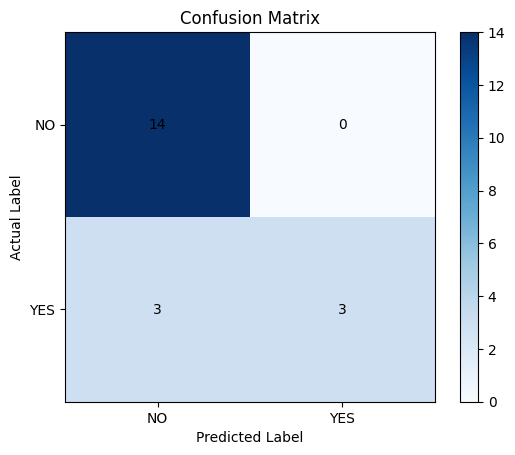

In [3]:
# 20
pred_path_40 = r"../Final/result/test_predictions_10_1.csv" 
pred_40 = pd.read_csv(pred_path_40)
visualize(truth, pred_40)

Accuracy: 0.85
Precision: 1.00
Recall: 0.50
F1 Score: 0.67


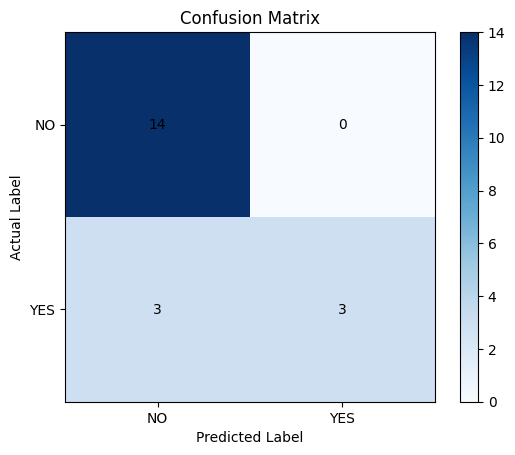

In [4]:
# 40
pred_path_40 = r"../Final/result/test_predictions_10_2.csv" 
pred_40 = pd.read_csv(pred_path_40)
visualize(truth, pred_40)

Accuracy: 0.85
Precision: 1.00
Recall: 0.50
F1 Score: 0.67


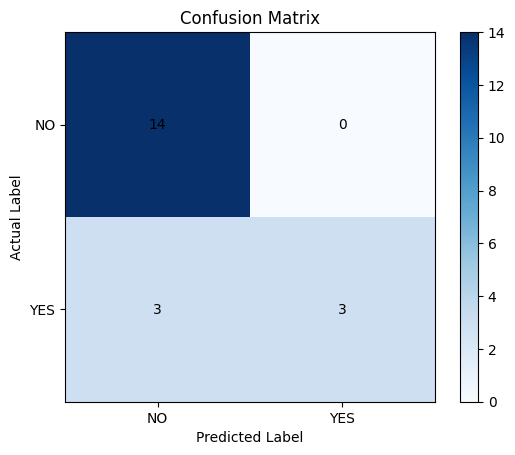

In [5]:
# 40
pred_path_40 = r"../Final/result/test_predictions_20_1.csv" 
pred_40 = pd.read_csv(pred_path_40)
visualize(truth, pred_40)

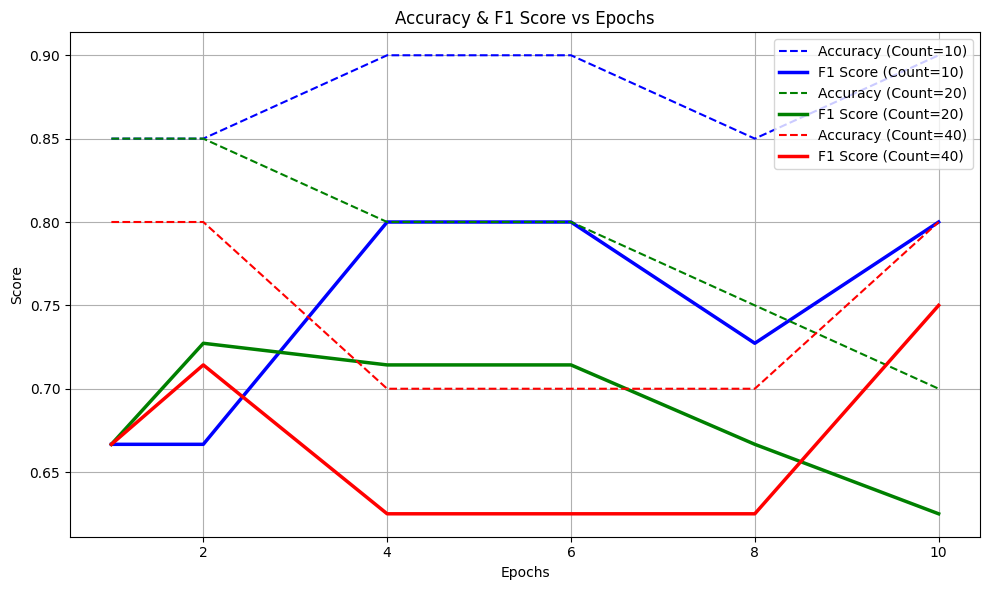

In [6]:
import os
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# === Load ground truth ===
truth_path = r"../Final/csv_data/new_test_actual.csv"
truth_df = pd.read_csv(truth_path)
truth_df['filename'] = truth_df['filename'].str.replace('.pdf', '', regex=False)

# === Folder with result CSVs ===
result_folder = "result"

# Store scores by count and epoch
metrics_by_count = {}

# Go through each result file
for file in os.listdir(result_folder):
    if not file.endswith(".csv"):
        continue
    
    # Extract count and epoch from file name: test_predictions_<count>_<epoch>.csv
    parts = file.replace(".csv", "").split("_")
    count = int(parts[2])
    epoch = int(parts[3])
    
    pred_df = pd.read_csv(os.path.join(result_folder, file))
    pred_df['filename'] = pred_df['filename'].str.replace('.pdf', '', regex=False)

    # Merge with ground truth
    merged = truth_df.merge(pred_df, on="filename", how="inner")

    y_true = merged["actual_label"].map({"YES": 1, "NO": 0})
    y_pred = merged["predicted_label"].map({"YES": 1, "NO": 0})

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Store metrics
    if count not in metrics_by_count:
        metrics_by_count[count] = {"epochs": [], "accuracy": [], "f1": []}
    
    metrics_by_count[count]["epochs"].append(epoch)
    metrics_by_count[count]["accuracy"].append(acc)
    metrics_by_count[count]["f1"].append(f1)

# === Plot ===
plt.figure(figsize=(10, 6))
colors = {10: 'blue', 20: 'green', 40: 'red'}

for count, metrics in sorted(metrics_by_count.items()):
    # Sort by epoch
    sorted_data = sorted(zip(metrics["epochs"], metrics["accuracy"], metrics["f1"]))
    epochs, accs, f1s = zip(*sorted_data)

    # Plot accuracy
    plt.plot(epochs, accs, label=f"Accuracy (Count={count})", linestyle='--', color=colors[count])

    # Plot F1 (thicker)
    plt.plot(epochs, f1s, label=f"F1 Score (Count={count})", linewidth=2.5, color=colors[count])

plt.xlabel("Epochs")
plt.ylabel("Score")
plt.title("Accuracy & F1 Score vs Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
